<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX3_Q2_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install package dtw

In [1]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=9f00e9d5f683729fb3c4ea4e7079b8f7f53e4ce8eaf7d8c57942e5c82a467611
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


import Required libraries

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from dtw import dtw
from numpy.linalg import norm
import cv2 as cv

MCB for ZA & ZB :

Normalized distance between
MCB_ZA & MAE_ZA : 13549.500671386719
MCB_ZA & MBD_ZA : 13969.538711547852
MCB_ZB & MAE_ZB : 11740.053344726562
MCB_ZB & MBD_ZB : 7939.795822143555


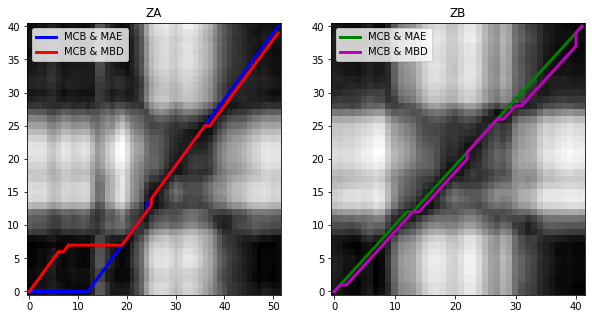

In [3]:
#load wave files [ZA]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_ZA.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_ZA.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_ZA.wav')

#load wave files [ZB]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_ZB.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_ZB.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_ZB.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_ZA & MAE_ZA :', dist1)
print ('MCB_ZA & MBD_ZA :', dist2)
print ('MCB_ZB & MAE_ZB :', dist3)
print ('MCB_ZB & MBD_ZB :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("ZA")
ax[1].set_title("ZB")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'w') as f:
    f.write("Normalized distances :\n")
    f.write("[ZA]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[ZB]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))   

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_Z.jpg')

MCB for 1A & 1B :

Normalized distance between
MCB_1A & MAE_1A : 12171.09977722168
MCB_1A & MBD_1A : 10917.624938964844
MCB_1B & MAE_1B : 11384.609725952148
MCB_1B & MBD_1B : 8906.544616699219


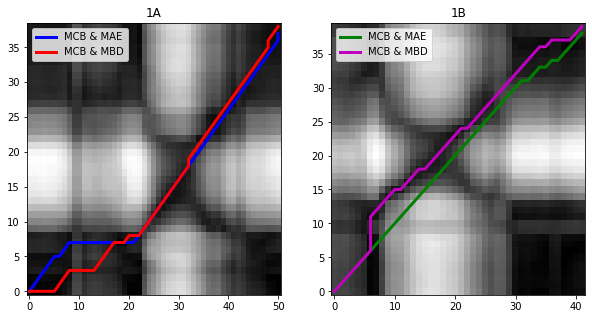

In [4]:
#load wave files [1A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_1A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_1A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_1A.wav')

#load wave files [1B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_1B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_1B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_1B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_1A & MAE_1A :', dist1)
print ('MCB_1A & MBD_1A :', dist2)
print ('MCB_1B & MAE_1B :', dist3)
print ('MCB_1B & MBD_1B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("1A")
ax[1].set_title("1B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[1A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[1B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_1.jpg')

MCB for 2A & 2B :

Normalized distance between
MCB_2A & MAE_2A : 9376.137870788574
MCB_2A & MBD_2A : 8573.07494354248
MCB_2B & MAE_2B : 10245.881927490234
MCB_2B & MBD_2B : 8671.663375854492


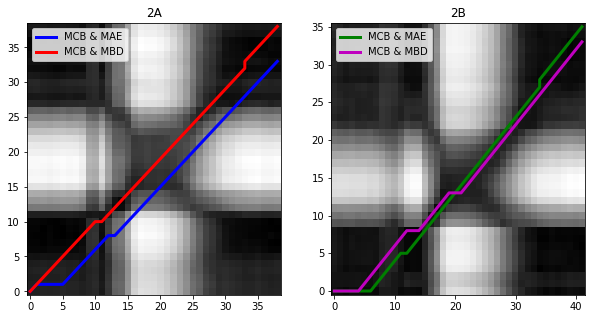

In [6]:
#load wave files [2A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_2A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_2A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_2A.wav')

#load wave files [2B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_2B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_2B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_2B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_2A & MAE_2A :', dist1)
print ('MCB_2A & MBD_2A :', dist2)
print ('MCB_2B & MAE_2B :', dist3)
print ('MCB_2B & MBD_2B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("2A")
ax[1].set_title("2B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[2A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[2B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_2.jpg')

MCB for 3A & 3B :

Normalized distance between
MCB_3A & MAE_3A : 11506.415702819824
MCB_3A & MBD_3A : 9968.664394378662
MCB_3B & MAE_3B : 8769.380828857422
MCB_3B & MBD_3B : 6845.310012817383


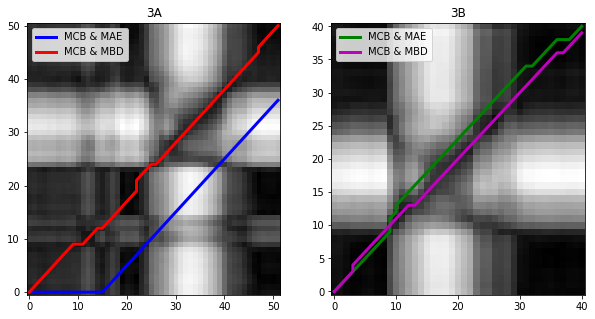

In [7]:
#load wave files [3A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_3A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_3A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_3A.wav')

#load wave files [3B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_3B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_3B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_3B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_3A & MAE_3A :', dist1)
print ('MCB_3A & MBD_3A :', dist2)
print ('MCB_3B & MAE_3B :', dist3)
print ('MCB_3B & MBD_3B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("3A")
ax[1].set_title("3B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[3A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[3B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_3.jpg')

MCB for 4A & 4B :

Normalized distance between
MCB_4A & MAE_4A : 12789.224868774414
MCB_4A & MBD_4A : 11589.2626953125
MCB_4B & MAE_4B : 9445.106750488281
MCB_4B & MBD_4B : 8162.416664123535


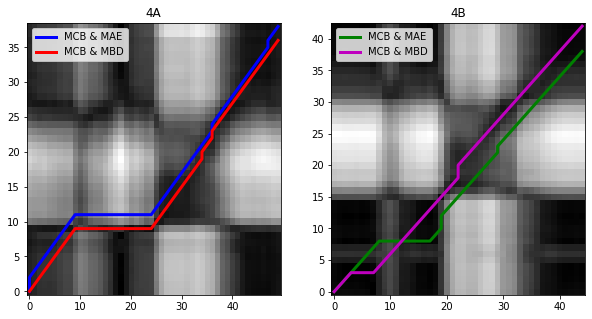

In [8]:
#load wave files [4A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_4A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_4A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_4A.wav')

#load wave files [4B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_4B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_4B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_4B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_4A & MAE_4A :', dist1)
print ('MCB_4A & MBD_4A :', dist2)
print ('MCB_4B & MAE_4B :', dist3)
print ('MCB_4B & MBD_4B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("4A")
ax[1].set_title("4B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[4A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[4B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_4.jpg')

MCB for 5A & 5B :

Normalized distance between
MCB_5A & MAE_5A : 8582.816528320312
MCB_5A & MBD_5A : 6753.7895431518555
MCB_5B & MAE_5B : 9787.803085327148
MCB_5B & MBD_5B : 8898.397331237793


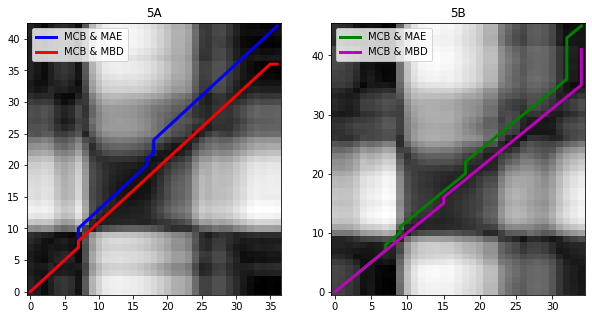

In [9]:
#load wave files [5A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_5A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_5A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_5A.wav')

#load wave files [5B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_5B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_5B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_5B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_5A & MAE_5A :', dist1)
print ('MCB_5A & MBD_5A :', dist2)
print ('MCB_5B & MAE_5B :', dist3)
print ('MCB_5B & MBD_5B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("5A")
ax[1].set_title("5B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[5A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[5B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_5.jpg')

MCB for 6A & 6B :

Normalized distance between
MCB_6A & MAE_6A : 12162.716346740723
MCB_6A & MBD_6A : 11233.01042175293
MCB_6B & MAE_6B : 10548.520118713379
MCB_6B & MBD_6B : 8207.998281478882


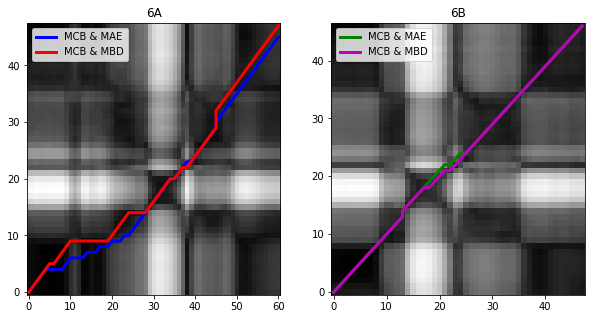

In [10]:
#load wave files [6A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_6A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_6A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_6A.wav')

#load wave files [6B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_6B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_6B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_6B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_6A & MAE_6A :', dist1)
print ('MCB_6A & MBD_6A :', dist2)
print ('MCB_6B & MAE_6B :', dist3)
print ('MCB_6B & MBD_6B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("6A")
ax[1].set_title("6B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[6A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[6B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_6.jpg')

MCB for 7A & 7B :

Normalized distance between
MCB_7A & MAE_7A : 11794.266784667969
MCB_7A & MBD_7A : 11300.149826049805
MCB_7B & MAE_7B : 10624.493621826172
MCB_7B & MBD_7B : 9822.143768310547


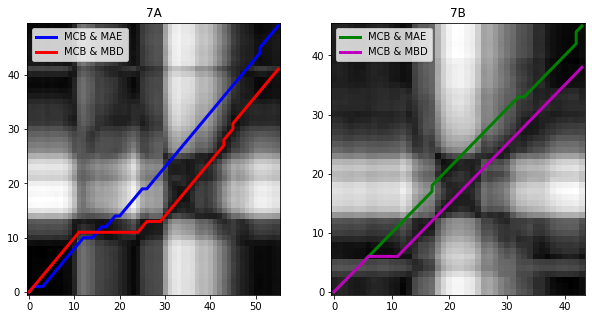

In [11]:
#load wave files [7A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_7A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_7A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_7A.wav')

#load wave files [7B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_7B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_7B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_7B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_7A & MAE_7A :', dist1)
print ('MCB_7A & MBD_7A :', dist2)
print ('MCB_7B & MAE_7B :', dist3)
print ('MCB_7B & MBD_7B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("7A")
ax[1].set_title("7B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[7A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[7B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_7.jpg')

MCB for 8A & 8B :

Normalized distance between
MCB_8A & MAE_8A : 9654.63264465332
MCB_8A & MBD_8A : 8605.748764038086
MCB_8B & MAE_8B : 9356.926025390625
MCB_8B & MBD_8B : 5855.558433532715


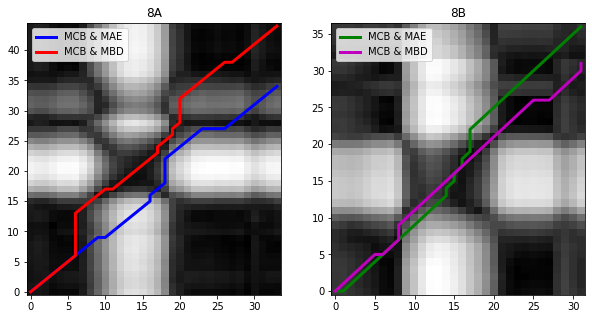

In [12]:
#load wave files [8A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_8A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_8A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_8A.wav')

#load wave files [8B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_8B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_8B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_8B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_8A & MAE_8A :', dist1)
print ('MCB_8A & MBD_8A :', dist2)
print ('MCB_8B & MAE_8B :', dist3)
print ('MCB_8B & MBD_8B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("8A")
ax[1].set_title("8B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[8A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[8B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_8.jpg')

MCB for 9A & 9B :

Normalized distance between
MCB_9A & MAE_9A : 12380.933418273926
MCB_9A & MBD_9A : 11027.512474060059
MCB_9B & MAE_9B : 11009.787002563477
MCB_9B & MBD_9B : 7667.719039916992


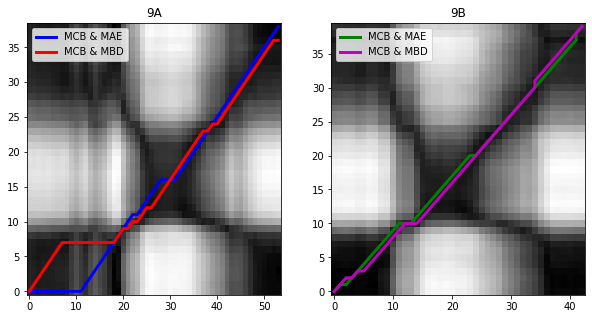

In [13]:
#load wave files [9A]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_9A.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_9A.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_9A.wav')

#load wave files [9B]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_9B.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_9B.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_9B.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_9A & MAE_9A :', dist1)
print ('MCB_9A & MBD_9A :', dist2)
print ('MCB_9B & MAE_9B :', dist3)
print ('MCB_9B & MBD_9B :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("9A")
ax[1].set_title("9B")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[9A]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[9B]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_9.jpg')

MCB for OA & OB :

Normalized distance between
MCB_OA & MAE_OA : 8371.275718688965
MCB_OA & MBD_OA : 6795.01960849762
MCB_OB & MAE_OB : 10083.395614624023
MCB_OB & MBD_OB : 8494.626974105835


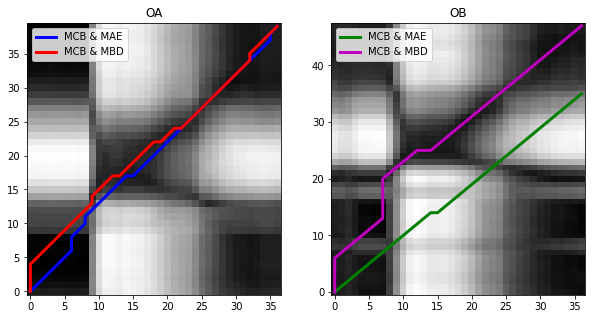

In [14]:
#load wave files [OA]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/MCB_OA.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/MAE_OA.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/MBD_OA.wav')

#load wave files [OB]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/MCB_OB.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/MAE_OB.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/MBD_OB.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('MCB_OA & MAE_OA :', dist1)
print ('MCB_OA & MBD_OA :', dist2)
print ('MCB_OB & MAE_OB :', dist3)
print ('MCB_OB & MBD_OB :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="MCB & MAE", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="MCB & MBD", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="MCB & MAE", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="MCB & MBD", linewidth=3)

ax[0].set_title("OA")
ax[1].set_title("OB")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_a/MCB.txt', 'a') as f:
    f.write("\n[OA]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist1))
    f.write('\nMCB & MBD : ')
    f.write(str(dist2))
    f.write("\n[OB]\n")
    f.write('MCB & MAE : ')
    f.write(str(dist3))
    f.write('\nMCB & MBD : ')
    f.write(str(dist4))

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_a/MCB_O.jpg')